In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys

In [3]:
sys.path.append(r'/Users/alexandershubert/git/statslib')

In [87]:
import matplotlib as mpl

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
import statsmodels.api as sm

In [139]:
import statslib as stb

In [7]:
pa = stb.utils.common.print_attributes
ddff = stb.utils.dframe.display_full_df

In [8]:
figsize = (8*1.6, 8)

In [9]:
y = stb.datasets.y

In [10]:
X = stb.datasets.X

***

In [11]:
import warnings
warnings.filterwarnings("ignore")

***

**For ARIMA-type models you must have index frequency provided**

In [12]:
try:
    y.index.freq = 'D'
except Exception as e:
    print(e.args[0])

Inferred frequency None from passed values does not conform to passed frequency D


In [13]:
y = y.resample('D').mean().fillna(method='ffill')

In [14]:
try:
    X.index.freq = 'D'
except Exception as e:
    print(e.args[0])

Inferred frequency None from passed values does not conform to passed frequency D


In [15]:
X = X.resample('D').mean().fillna(method='ffill')

***

In [16]:
f = stb.transforms.pct_change(1)

In [17]:
X['Lag1ABT'] = X['ABT'].shift(1)

In [18]:
X['Lag2ABT'] = X['ABT'].shift(2)

In [19]:
g1 = stb.transforms.pct_change(1)

In [20]:
g2 = stb.transforms.difference_operator(1,1,3, inv_specification=[[-1, -1, 1], [1, 3, 4]])

In [21]:
g3 = stb.transforms.log_return(3)

In [22]:
g4 = g5 = lambda s: s

***

In [23]:
DM = stb.DesignMatrix(y, f, X, [g1, g2, g3, g4, g5])

In [24]:
DM.names

{'v': 'A',
 'g1': 'ABC',
 'g2': 'ABMD',
 'g3': 'ABT',
 'g4': 'Lag1ABT',
 'g5': 'Lag2ABT',
 'const': 'const'}

## Exploratory analsis of Design Matrix

In [25]:
DM.dm_ext.head(5)

,A,v,ABC,ABMD,ABT,Lag1ABT,Lag2ABT,const,g1,g2,g3,g4,g5
day,,,,,,,,,,,,,
2018-12-18,67.989998,NaN,76.239998,304.799988,70.080002,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2018-12-19,66.830002,-0.017061,76.309998,296.140015,69.000000,70.080002,NaN,1.0,0.000918,NaN,NaN,70.080002,NaN
2018-12-20,65.190002,-0.024540,73.220001,284.279999,68.379997,69.000000,70.080002,1.0,-0.040493,NaN,NaN,69.000000,70.080002
2018-12-21,63.290001,-0.029146,71.980003,290.290009,67.269997,68.379997,69.000000,1.0,-0.016935,NaN,-0.040923,68.379997,69.000000
2018-12-22,63.290001,0.000000,71.980003,290.290009,67.269997,67.269997,68.379997,1.0,0.000000,8.659973,-0.025392,67.269997,68.379997


In [26]:
DM.dm.head(5)

,y,v,const,g1,g2,g3,g4,g5
day,,,,,,,,
2018-12-22,63.290001,0.000000,1.0,0.000000,8.659973,-0.025392,67.269997,68.379997
2018-12-23,63.290001,0.000000,1.0,0.000000,11.860016,-0.016366,67.269997,67.269997
2018-12-24,62.669998,-0.009796,1.0,-0.016949,-15.220032,-0.025749,67.269997,67.269997
2018-12-25,62.669998,0.000000,1.0,0.000000,0.000000,-0.025749,65.559998,67.269997
2018-12-26,65.540001,0.045795,1.0,0.032222,26.360016,0.034338,65.559998,65.559998


In [27]:
DM.gX.head()

,const,g1,g2,g3,g4,g5
day,,,,,,
2018-12-22,1.0,0.000000,8.659973,-0.025392,67.269997,68.379997
2018-12-23,1.0,0.000000,11.860016,-0.016366,67.269997,67.269997
2018-12-24,1.0,-0.016949,-15.220032,-0.025749,67.269997,67.269997
2018-12-25,1.0,0.000000,0.000000,-0.025749,65.559998,67.269997
2018-12-26,1.0,0.032222,26.360016,0.034338,65.559998,65.559998


### Exploratory analysis 

,A,ABC,ABMD,ABT,Lag1ABT,Lag2ABT
count,366.000000,366.000000,366.000000,366.000000,365.000000,364.000000
mean,74.543443,82.406038,254.256448,79.866680,79.847329,79.827514
std,4.904770,4.910670,58.831746,5.403820,5.398523,5.392646
min,62.669998,70.760002,159.309998,65.559998,65.559998,65.559998
25%,70.185001,78.704998,192.099998,76.290001,76.260002,76.250002
50%,75.555000,83.500000,260.489990,80.889999,80.739998,80.739998
75%,78.260002,86.320000,294.677513,84.269997,84.269997,84.262501
max,84.809998,91.699997,362.250000,88.739998,88.739998,88.739998


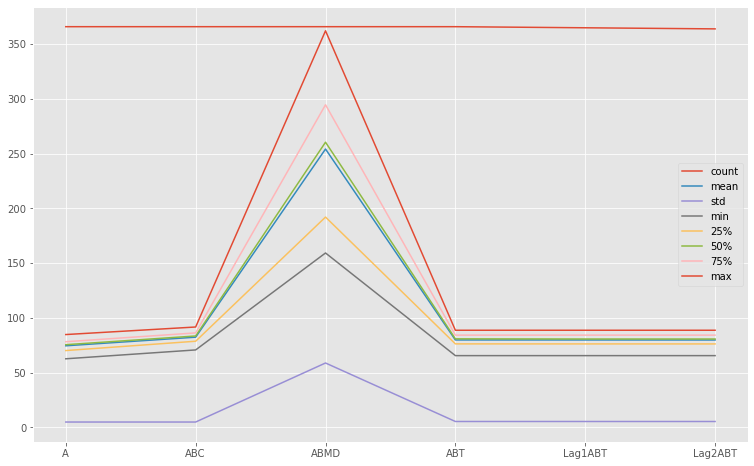

In [72]:
DM.describe()

### Let's see trend / seasonal decomposition (STL)

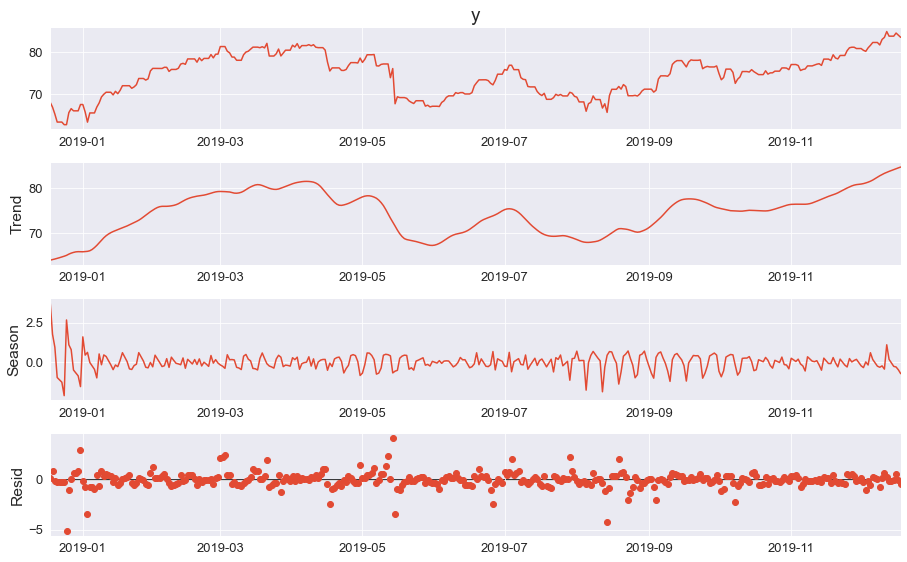

In [156]:
results = DM.seasonal_decompose(robust=True)

#### Look at residuals after decomposition

In [157]:
residuals = results.resid

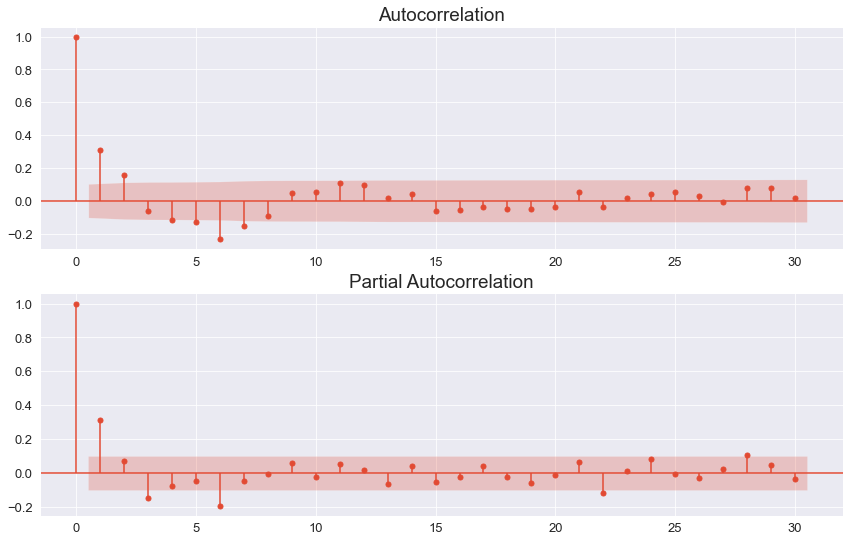

In [158]:
stb.stat_plots.plot_acf_pcf(residuals)

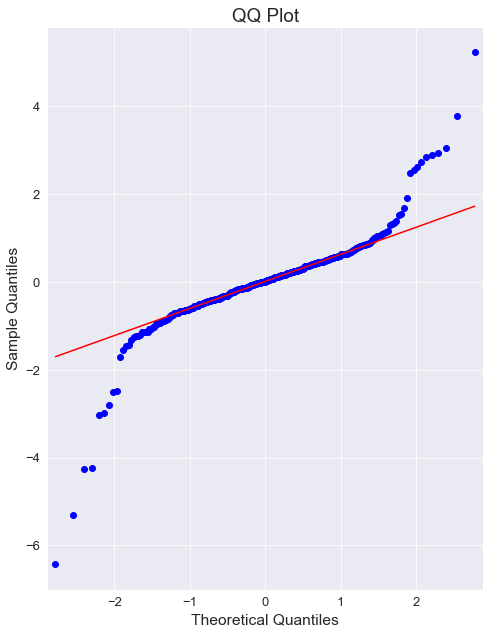

In [159]:
stb.stat_plots.plot_qq_plot(residuals)

### This way we can plot $y_t$ vs. $v$ and $x^k_t$ vs. $g^kx_{t}$ relationship

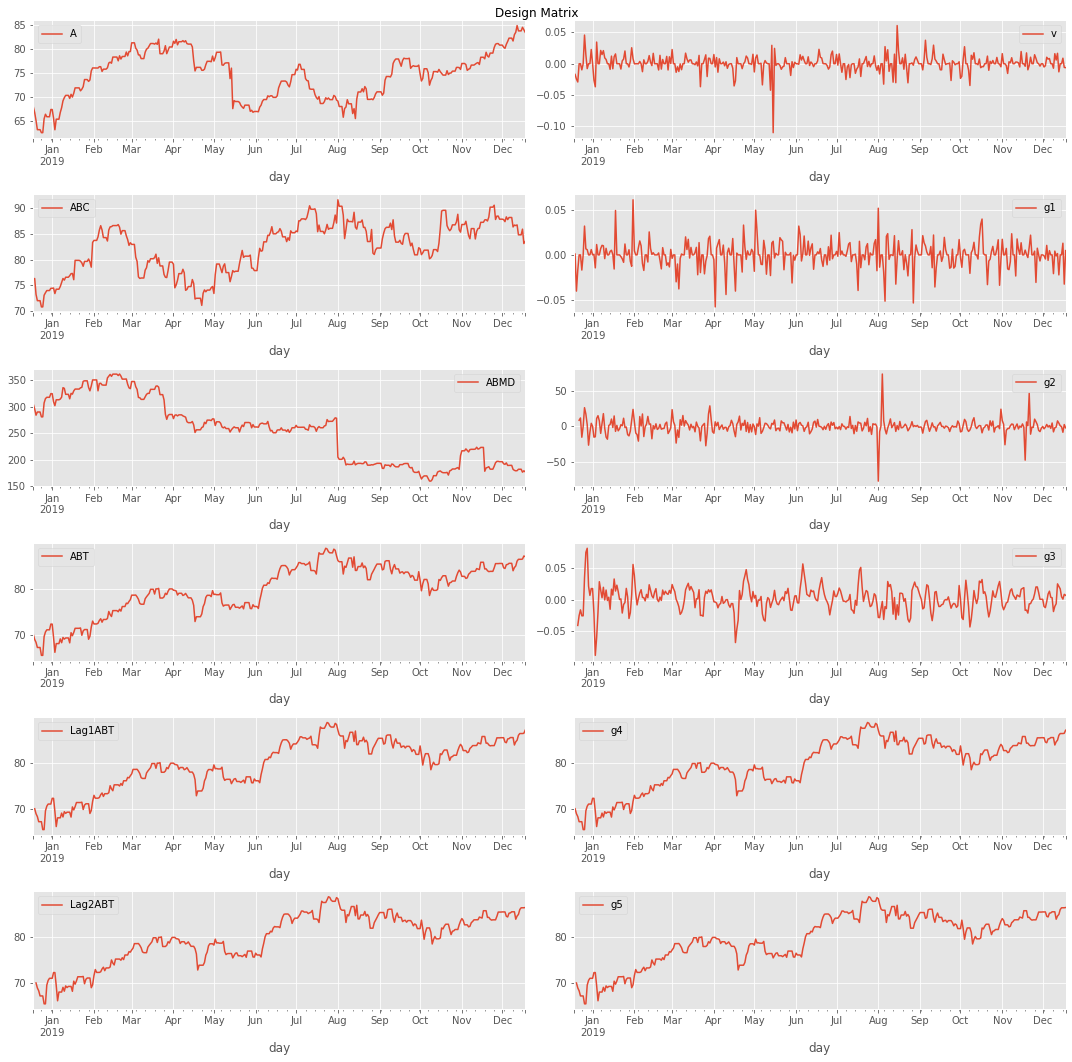

In [28]:
DM.plot()

### This way we can plot $y_t$ vs $x^k_t$ relationship to see the plausible shape of dependency

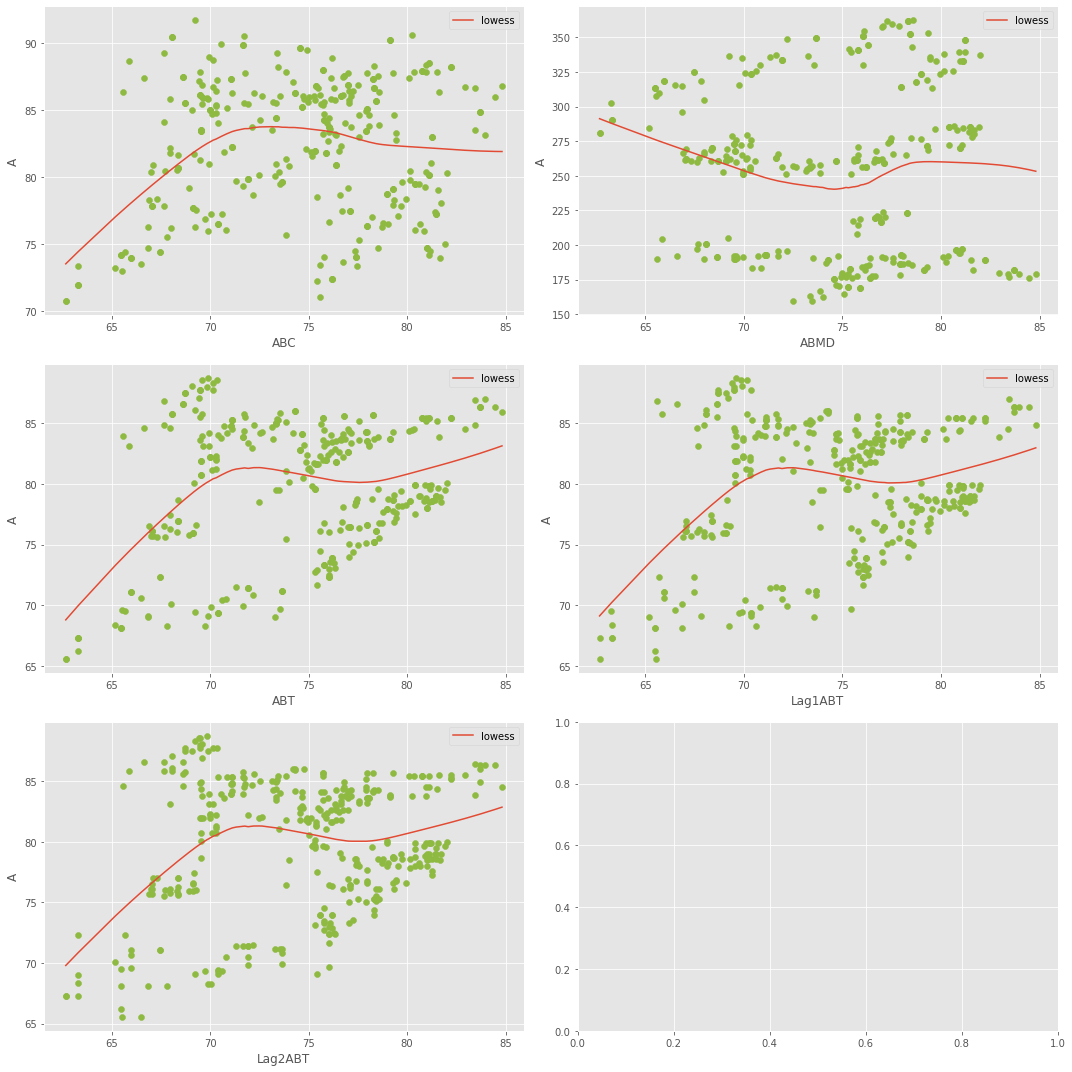

In [29]:
DM.plot_scatter_lowess()

### Plot Autocorrelation and Partial AutoCorrelation

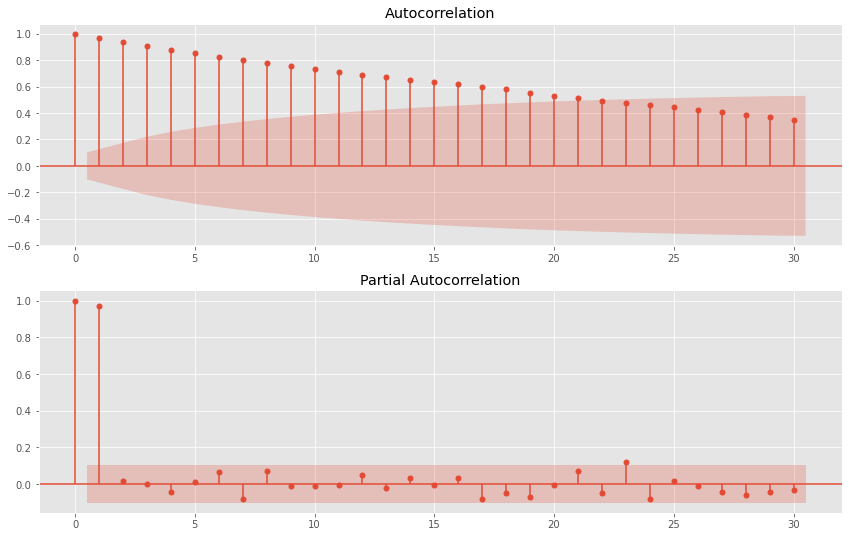

In [30]:
stb.stat_plots.plot_acf_pcf(DM.dm_ext.ABC)

### This way we can plot $x^k_t$ vs $x^k_{t-h}$ relationship for a given covariate $k$ as another way to demonstrate the autocorrelation.

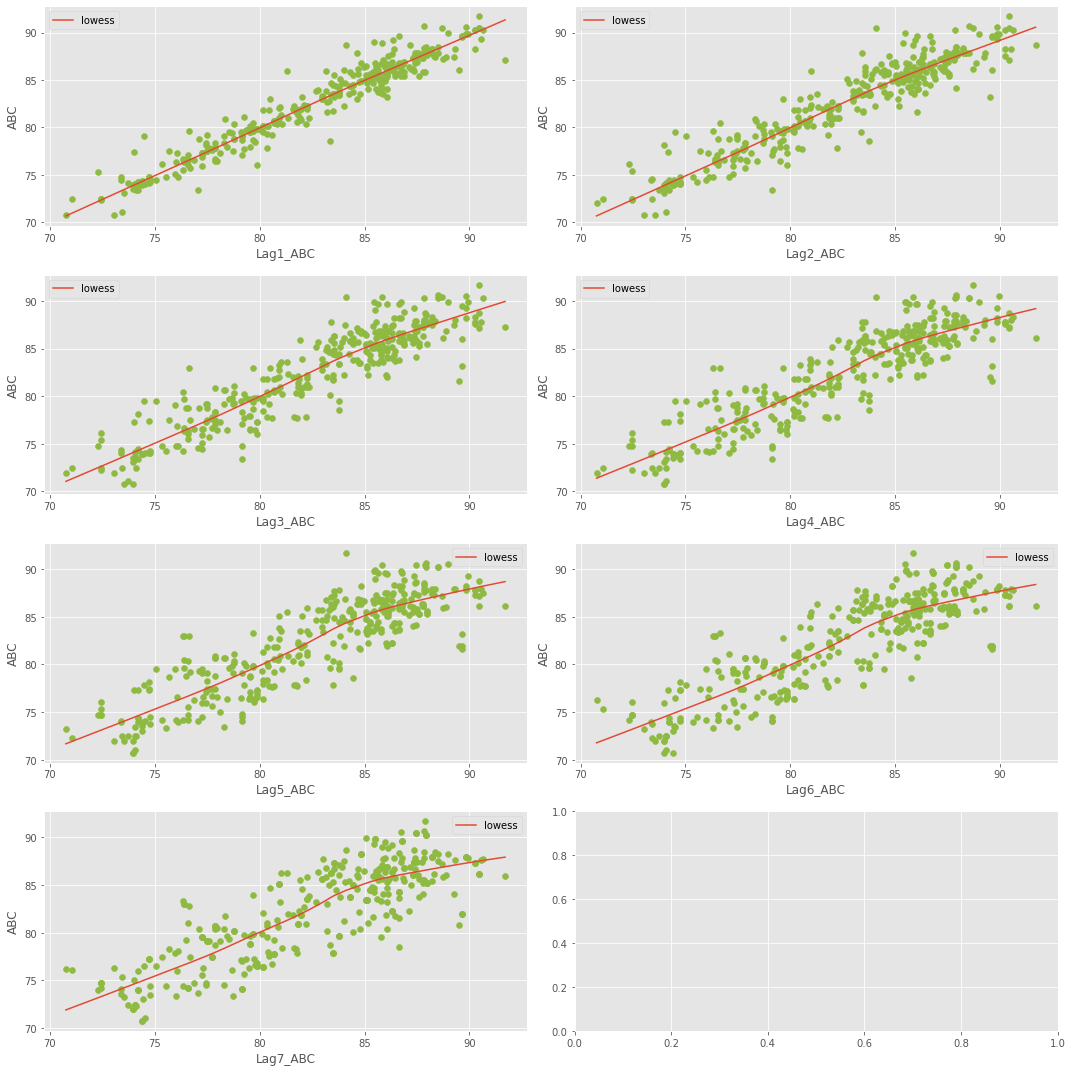

In [31]:
DM.plot_covariate_vs_lag(covariate_name='ABC', up_to_lag=7)

### This way we can plot $y_t$ vs $x^k_{t-h}$ relationship for a given covariate $k$ to see if there is a lead-lag relationship

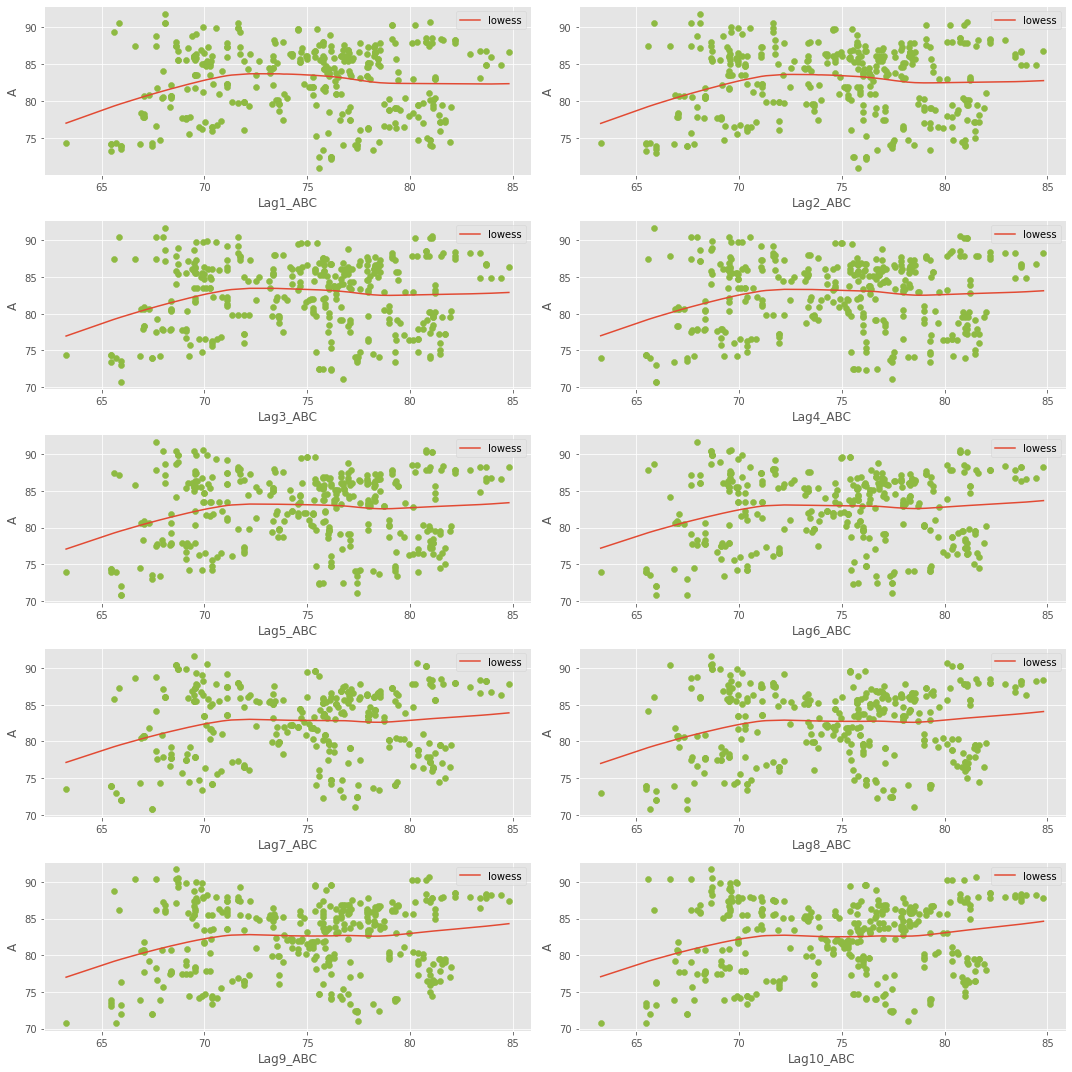

In [32]:
DM.plot_dependent_vs_covariage_lag('ABC', 10)

***

* Don't forget to create Train - Validation - Test (out-of-sample) parts
* Once done: you have to play with the calibrator on all the train set (which in turn is split into train/test splits for cross-validation algorithm)

## Grid search for parameters

Model Specification:

    - arima values
    - composition of covariates

In [150]:
from itertools import product

grid = product(range(1,3), [0], range(1,3))

results = []
for elem in grid:
    try:
        gc = stb.GeneralCalibrator(sm.tsa.arima.ARIMA, 
                                       dict(order=elem, 
                                       trend='n', 
                                       enforce_stationarity=True))
        gm = stb.GeneralModel(gc, DM)
        gm.fit(range(10))
        results.append([elem, gm.fitted.aic])
    except:
        continue

pd.DataFrame(results, columns=['elem', 'aic']).sort_values(by=['aic'], ascending=True)

,elem,aic
0,"(1, 0, 1)",-59.355184
2,"(2, 0, 1)",-54.730485
1,"(1, 0, 2)",-51.203758
3,"(2, 0, 2)",-45.468849


In [146]:
from copy import deepcopy
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1)) #without empty set

grid = list(product(['const'], [DM._inv_names.get(k) for k in DM.endog_names]))
nms = [DM._inv_names.get(k) for k in DM.endog_names]

grid = product(['const'], powerset(nms))
results = []
for elem in grid:
    try:
        c, v = elem
        nm = [c] + list(v)
        gc = stb.GeneralCalibrator(sm.OLS, dict())
        nDM = deepcopy(DM)
        nDM.gX = nDM.gX[nm]
        gm = stb.GeneralModel(gc, nDM)
        gm.fit(range(DM.dm.shape[0]))
        results.append([elem, gm.fitted.rsquared_adj, nm])
    except:
        continue
pd.DataFrame(results, columns=['elem', 'metric', 'config']).sort_values(
    by=['metric'], ascending=True)[['config', 'metric']].head(15)

,config,metric
4,"[const, g5]",0.001899
3,"[const, g4]",0.004181
14,"[const, g4, g5]",0.008959
1,"[const, g2]",0.033814
11,"[const, g2, g5]",0.034261
10,"[const, g2, g4]",0.036618
23,"[const, g2, g4, g5]",0.045420
8,"[const, g1, g5]",0.065670
0,"[const, g1]",0.066073
7,"[const, g1, g4]",0.067591


# CV: Train Test Splits

In [147]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=6)
splits = [(train_idx, test_idx)for train_idx, test_idx in tscv.split(DM.dm.index)]

In [148]:
metric = stb.metrics.mean_absolute_percentage_error

## Modelling 

CV_error: 0.0843 +/- 0.0543


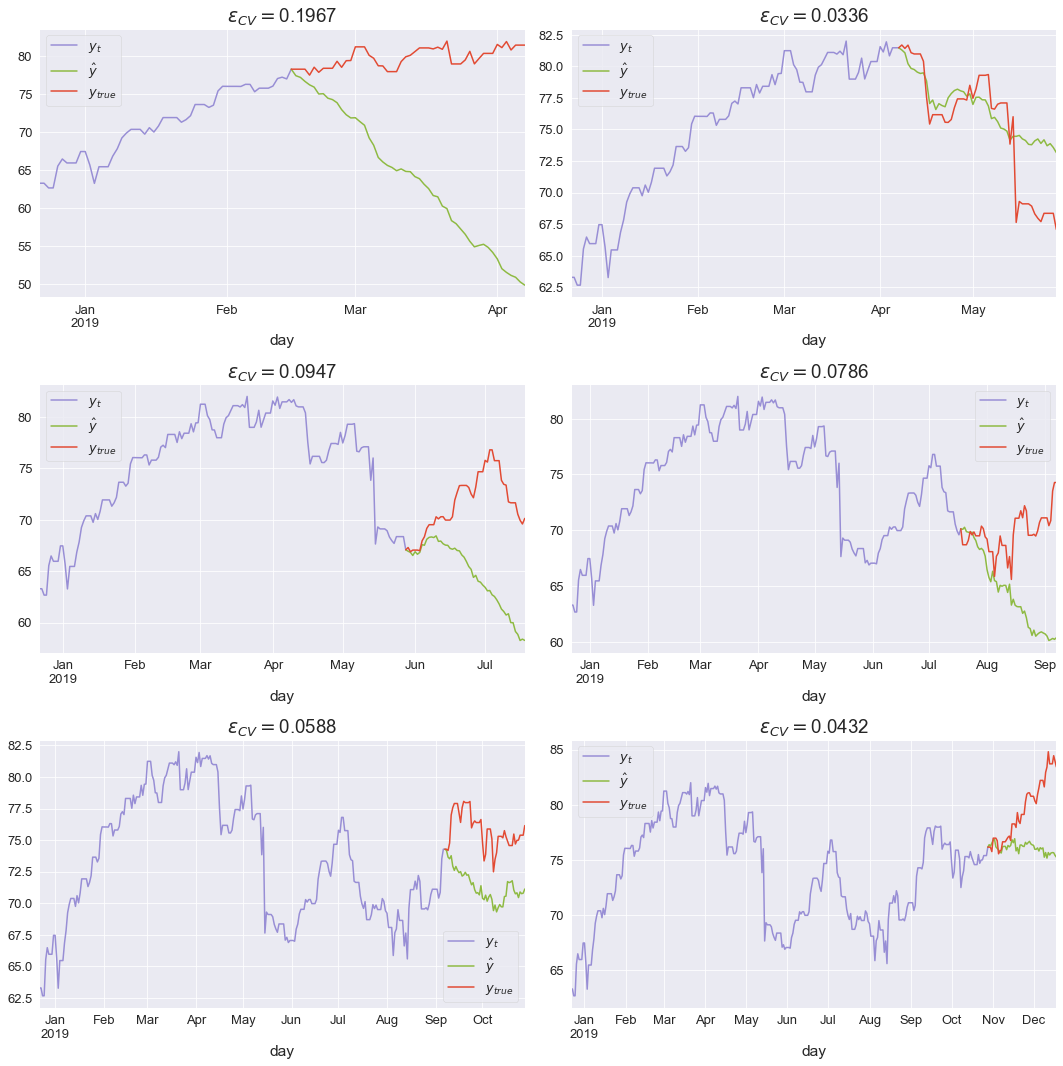

In [151]:
gc = stb.GeneralCalibrator(sm.tsa.arima.ARIMA, 
                               dict(order=(1,0,1), 
                               trend='n', 
                               enforce_stationarity=True))
gm = stb.GeneralModel(gc, DM)
cv = stb.CrossValidation(gm, splits, metric=metric)
cv_m, cv_std = cv.run()

CV_error: 0.1054 +/- 0.0633


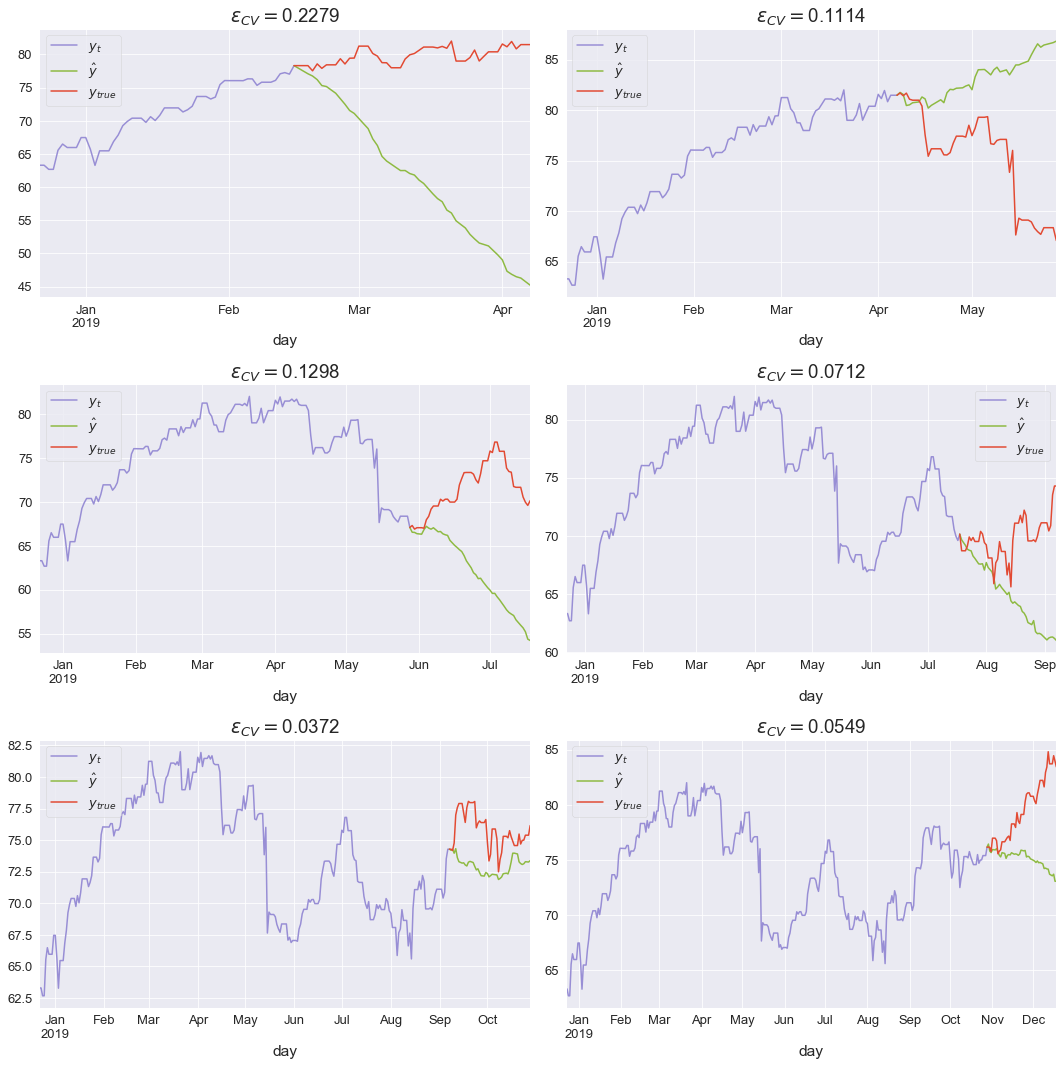

In [152]:
gc = stb.GeneralCalibrator(sm.OLS, dict())
nDM = deepcopy(DM)
nm = ['const', 'g1', 'g4']
nDM.gX = nDM.gX[nm]
gm = stb.GeneralModel(gc, nDM)
cv = stb.CrossValidation(gm, splits, metric)
cv_m, cv_std = cv.run()

CV_error: 0.0718 +/- 0.0386


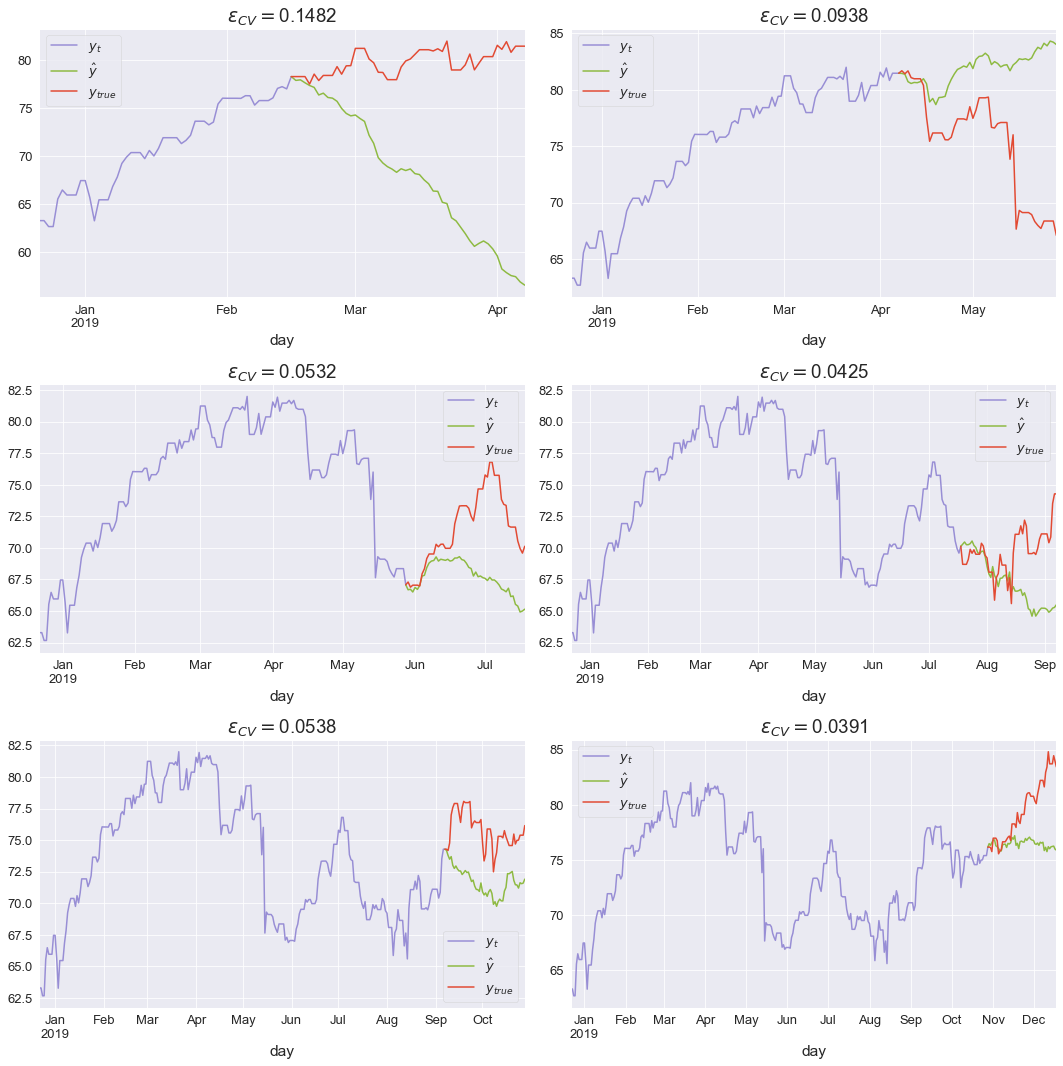

In [153]:
gc = stb.GeneralCalibrator(sm.RLM, dict())
gm = stb.GeneralModel(gc, DM)
cv = stb.CrossValidation(gm, splits, metric)
cv_m, cv_std = cv.run()

## Residuals Analysis

In [128]:
gm.calibrator

In [129]:
gm.fit(range(100))

In [130]:
gm.forecast(range(100))

In [131]:
res = gm.residuals

In [ ]:
stb.stat_tests.test_kpss(res)

In [ ]:
stb.stat_plots.plot_acf_pcf(res)

In [ ]:
sm.graphics.qqplot(res)
plt.show()

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('darkgrid')

In [137]:
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

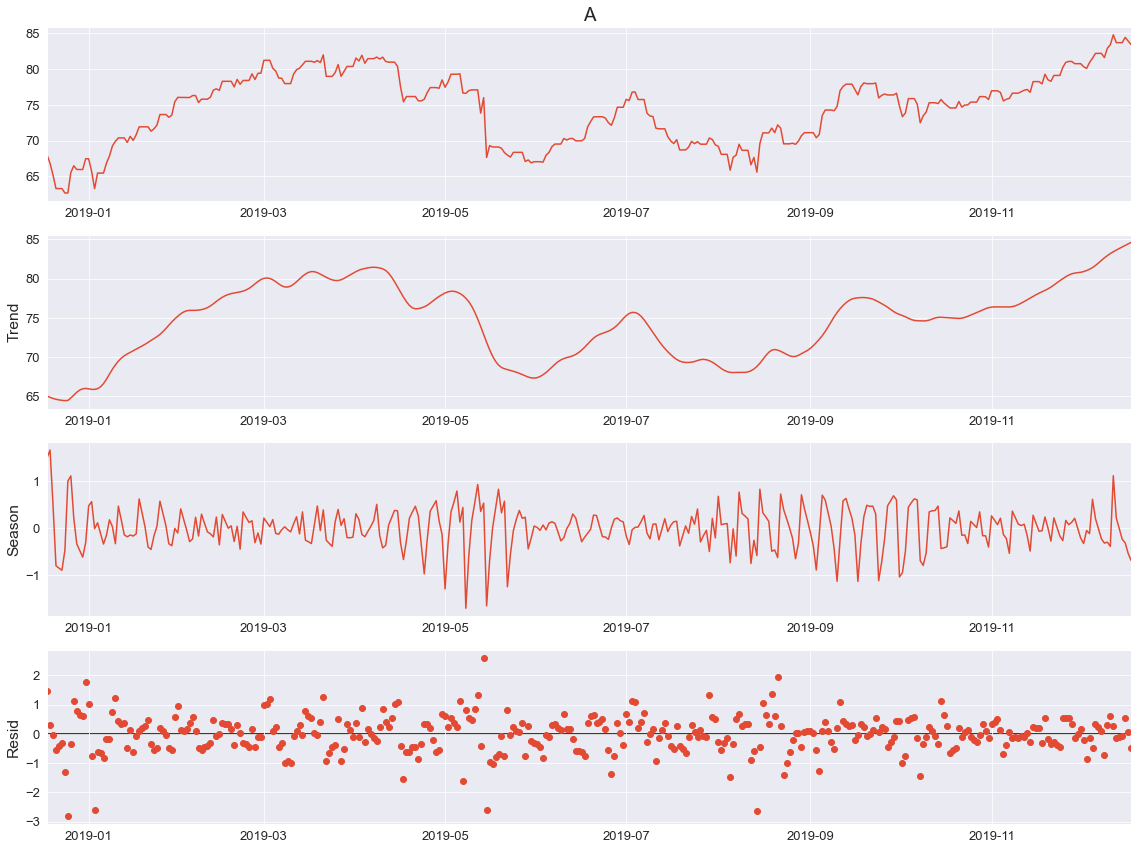

In [138]:
from statsmodels.tsa.seasonal import STL
stl = STL(y, seasonal=7)
res = stl.fit()
fig = res.plot()

In [ ]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)


stl = STL(y, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(y, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ['Robust','Non-robust'])

In [ ]:
res_non_robust.seasonal

## Out of time forecasting

****

In [ ]:
## Can we handle cross-sectional analysis?